<a href="https://colab.research.google.com/github/qnhhoa/DecisionSupportSystem/blob/source_code/Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kết nối tới drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request
import seaborn as sns

%matplotlib inline

In [3]:
# Train set
DOWNLOAD_URL = 'https://raw.githubusercontent.com/qnhhoa/DecisionSupportSystem/main/train.csv'
DATASET_DIR_PATH = '/content/drive/MyDrive/Colab Notebooks/DSS' # [directory path] để save dataset trên google drive
DATASET_PATH = os.path.join(DATASET_DIR_PATH, 'passenger_satis_raw.csv')

In [4]:
# Test set
TEST_URL = 'https://raw.githubusercontent.com/qnhhoa/DecisionSupportSystem/main/test.csv'
TESTSET_PATH = os.path.join(DATASET_DIR_PATH, 'test.csv')

Download and save dataset

In [5]:
def fetch_data(download_url, dataset_path):
    try:
        urllib.request.urlretrieve(download_url, dataset_path)
    except:
        print(f"failed to download and save dataset in {dataset_path}")
def test_set(test_url,testset_path):
    try:
        urllib.request.urlretrieve(test_url, testset_path)
    except:
        print(f"failed to download and save dataset in {testset_path}")

In [6]:
fetch_data(DOWNLOAD_URL, DATASET_PATH)
test_set(TEST_URL, TESTSET_PATH)

# **Data Preprocessing**


In [7]:
# load dataset
df = pd.read_csv(DATASET_PATH)

In [8]:
# load testset
test_set = pd.read_csv(TESTSET_PATH)

In [9]:
df1 = pd.concat([df, test_set])

In [10]:
# copy data ra một biến khác để đảm bảo an toàn cho dữ liệu
df_cp = df1.copy()

# **EDA - Exploratory Data Analysis**

# Decribe data

In [11]:
# kiểm tra 5 dòng đầu
df_cp.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [14]:
# check info
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [13]:
df_cp.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [12]:
df_cp.drop(columns=['Unnamed: 0','id'],axis=1, inplace=True)

In [15]:
def bar_plot(variable):
    # we get the features
    var = df_cp[variable]
    # count number of categorical variable
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
     

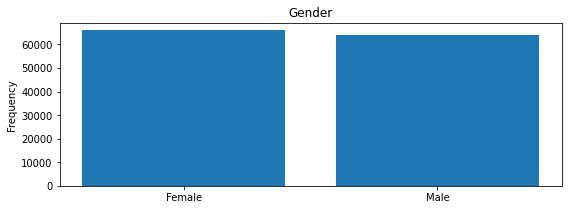

Gender: 
 Female    65899
Male      63981
Name: Gender, dtype: int64


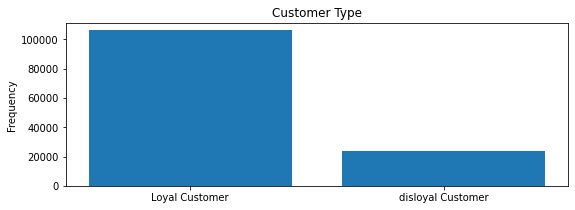

Customer Type: 
 Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64


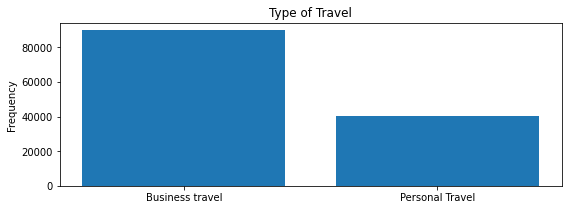

Type of Travel: 
 Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64


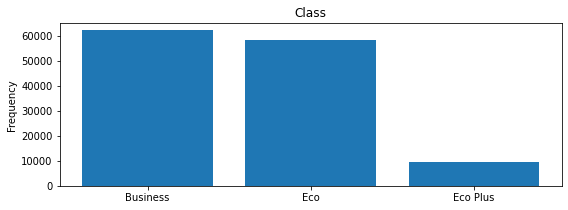

Class: 
 Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64


In [16]:
categorical_var = ["Gender", "Customer Type", "Type of Travel", "Class"]
for each in categorical_var:
    bar_plot(each)

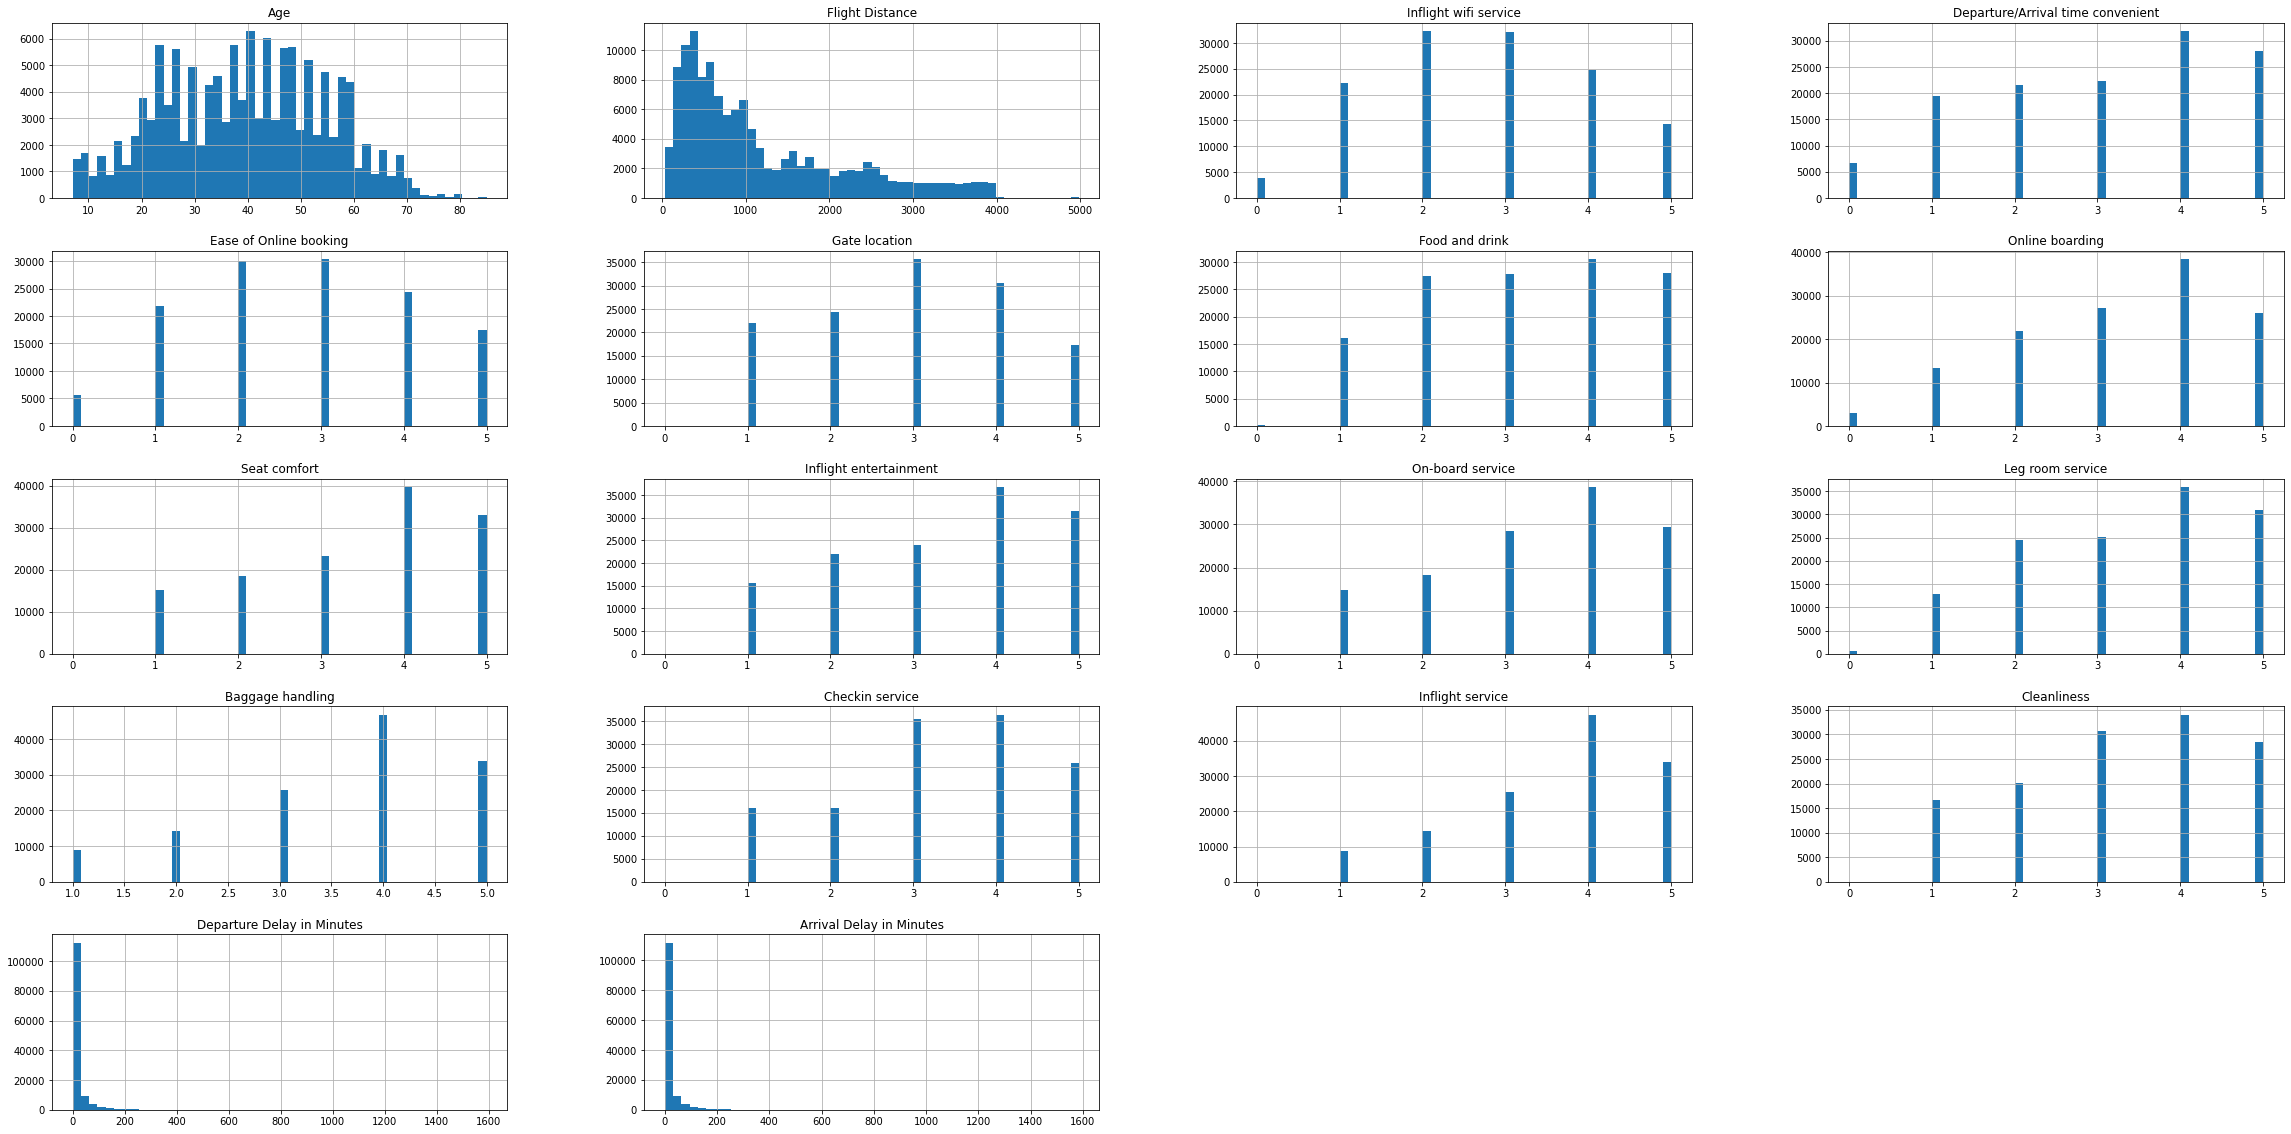

In [17]:
# check phân bố dữ liệu
df_cp.hist(bins=50,figsize=(40, 20))
plt.show()

# Outliers

In [16]:
# Lấy ra những cột dạng numeric trong data
numeric = df_cp.select_dtypes(exclude='object')
numeric

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


In [17]:
# Lấy ra những cột cần thiết
cols_to_check = [col for col in numeric.columns if col not in ['Exited']]
cols_to_check

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

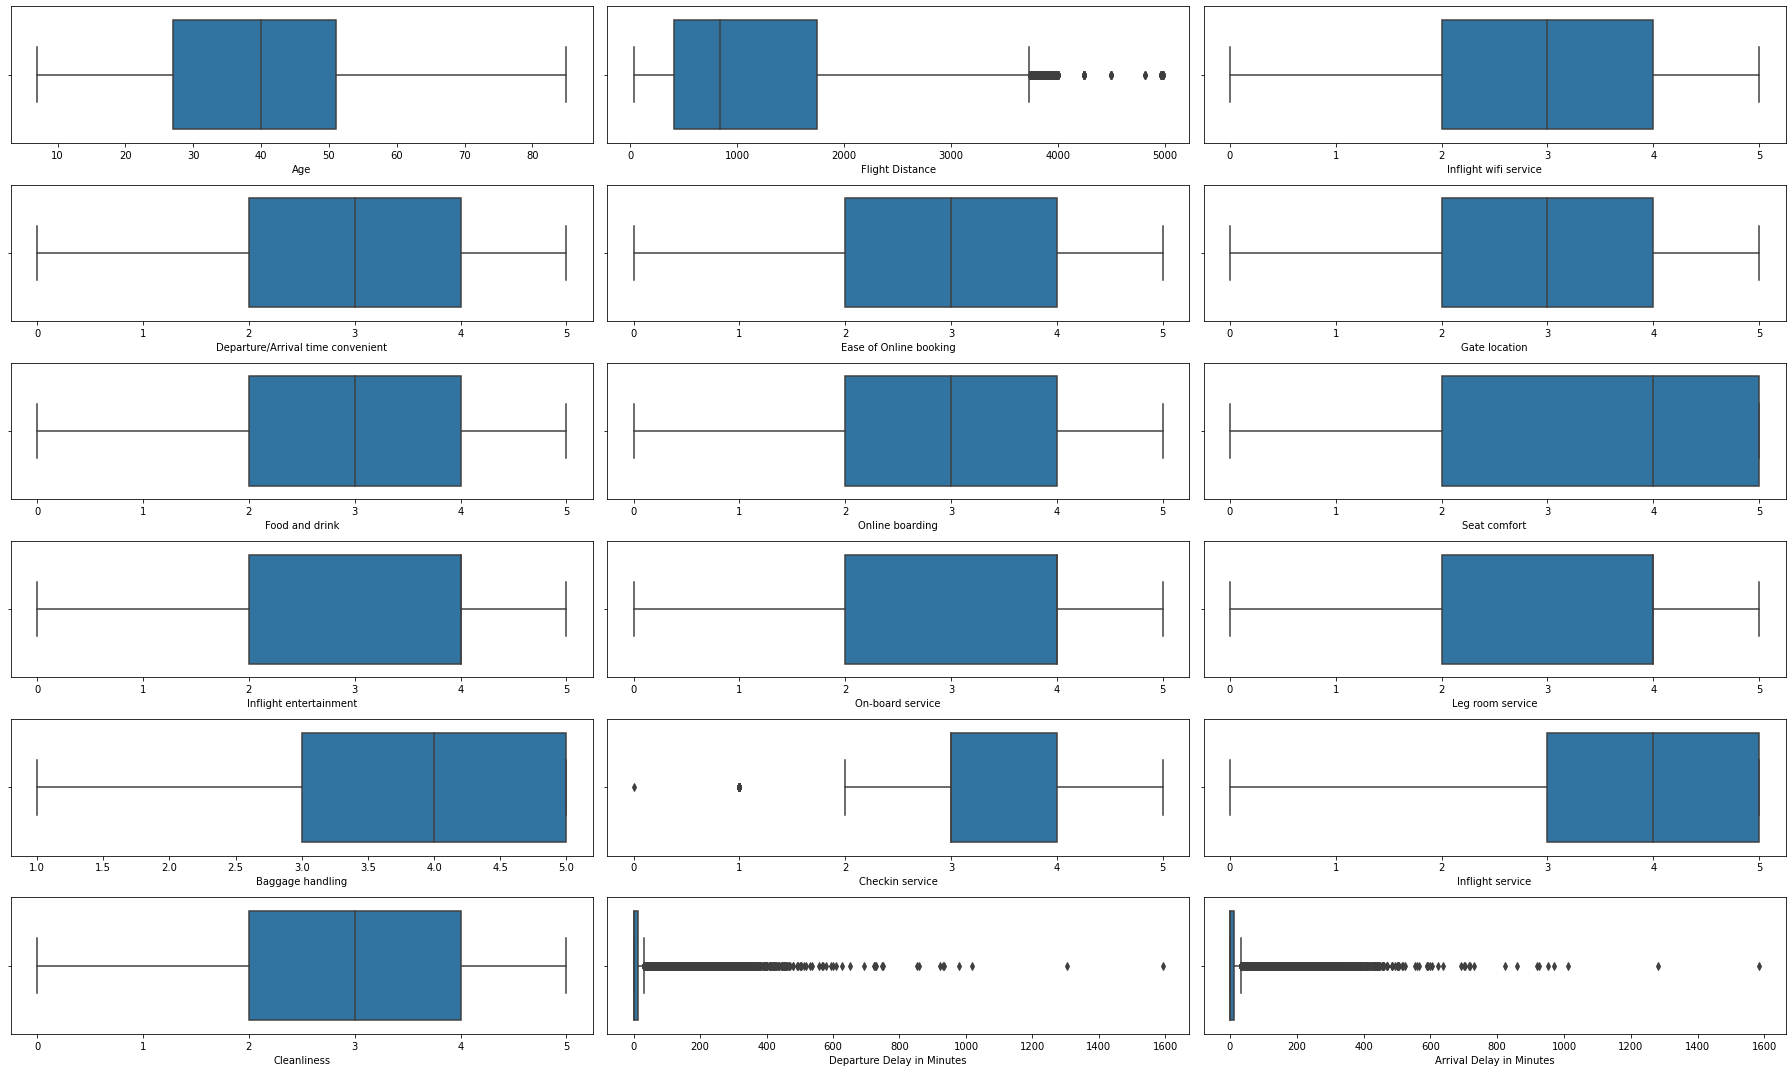

In [20]:
# visualize outliers sử dụng boxplot
fig, ax = plt.subplots(6, 3, figsize = (25, 15))
ax = ax.flatten()
for i, c in enumerate(cols_to_check):
    sns.boxplot(x = df[c], ax = ax[i])
fig.tight_layout()

# Missing Data

In [18]:
# check dữ liệu NaN
df_cp.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [19]:
# xóa dữ liệu null
df_cp.dropna(inplace=True)

# Data Cleaning

# Xử lý Outliers

In [23]:
# outlier columns
outlier_cols = ["Flight Distance", "Checkin service"]

def outlier_thresholds(dataframe, variable):
    Q1 = df_cp[variable].quantile(0.25)
    Q3 = df_cp[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    return lower_limit, upper_limit

def HandleOutliers(df):
    for col in outlier_cols:
        lower_limit, upper_limit = outlier_thresholds(df, col)
        print(f"{col} has {df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0]} outliers")
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

In [24]:
df_cp = HandleOutliers(df_cp)

Flight Distance has 2847 outliers
Checkin service has 15790 outliers


In [25]:
df_cp

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,Female,disloyal Customer,36,Business travel,Eco,432,1,5,1,3,...,4,5,2,5,2,3,4,0,0.0,neutral or dissatisfied
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied


# **Feature Engineering**

# Encode features

In [26]:
df_cp["satisfaction"].value_counts()

neutral or dissatisfied    60499
satisfied                  50351
Name: satisfaction, dtype: int64

In [27]:
df_cp["Gender"].value_counts()

Female    56216
Male      54634
Name: Gender, dtype: int64

In [28]:
df_cp["Class"].value_counts()

Business    54232
Eco         48922
Eco Plus     7696
Name: Class, dtype: int64

In [29]:
df_cp["Type of Travel"].value_counts()

Business travel    75593
Personal Travel    35257
Name: Type of Travel, dtype: int64

In [30]:
df_cp["Customer Type"].value_counts()

Loyal Customer       90444
disloyal Customer    20406
Name: Customer Type, dtype: int64

In [25]:
from sklearn.preprocessing import OneHotEncoder

# encoder column
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Class']]).toarray())
encoder_df.columns = df_cp["Class"].unique()

# join to original df
df_cp = df_cp.join(encoder_df)

In [32]:
# df_cp['Gender'] = df_cp["Gender"].map({value:idx for idx, value in enumerate(df_cp["Gender"].value_counts().index)})
# df_cp['Customer Type'] = df_cp["Customer Type"].map({value:idx for idx, value in enumerate(df_cp["Customer Type"].value_counts().index)})
# df_cp['Type of Travel'] = df_cp["Type of Travel"].map({value:idx for idx, value in enumerate(df_cp["Type of Travel"].value_counts().index)})
# df_cp['satisfaction'] = df_cp["satisfaction"].map({value:idx for idx, value in enumerate(df_cp["satisfaction"].value_counts().index)})

In [21]:
df_cp['Gender'].replace({'Male':1,'Female':0}, inplace=True)

In [23]:
df_cp['Type of Travel'].replace({'Personal Travel':1,'Business travel':0}, inplace=True)
df_cp['Customer Type'].replace({'Loyal Customer':1,'disloyal Customer':0}, inplace=True)
df_cp['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1}, inplace = True)

In [28]:
# results
df_cp.head(10)

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Eco Plus,Business,Eco
0,1,1,13,1,460,3,4,3,1,5,...,4,4,5,5,25,18.0,0,0.0,0.0,1.0
0,0,1,52,0,160,5,4,3,4,3,...,5,2,5,5,50,44.0,1,0.0,0.0,1.0
1,1,0,25,0,235,3,2,3,3,1,...,3,1,4,1,1,6.0,0,1.0,0.0,0.0
1,0,1,36,0,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,1,1.0,0.0,0.0
2,0,1,26,0,1142,2,2,2,2,5,...,4,4,4,5,0,0.0,1,1.0,0.0,0.0
2,1,0,20,0,192,2,0,2,4,2,...,3,2,2,2,0,0.0,0,1.0,0.0,0.0
3,0,1,25,0,562,2,5,5,5,2,...,3,1,4,2,11,9.0,0,1.0,0.0,0.0
3,1,1,44,0,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,1,1.0,0.0,0.0
4,1,1,61,0,214,3,3,3,3,4,...,4,3,3,3,0,0.0,1,1.0,0.0,0.0
4,0,1,49,0,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,1,1.0,0.0,0.0


# Feature Selection

### Chi-square test

In [34]:
from sklearn.feature_selection import SelectKBest, chi2

In [35]:
categorical_features = df_cp[["Gender", "Customer Type",	"Age",	"Type of Travel",	"Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",
                              "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                              "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Eco Plus", "Eco", "Business"]]

In [36]:
best_features = SelectKBest(chi2, k=21)
best_features.fit(categorical_features, df_cp["satisfaction"])

SelectKBest(k=21, score_func=<function chi2 at 0x7fcce1c88440>)

In [37]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['chi2_values'] = best_features.scores_
df_score['columns'] = ["Gender", "Customer Type",	"Age",	"Type of Travel",	"Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",
                              "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                              "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Eco Plus", "Eco", "Business"]
df_score.sort_values(by='p_values')

,p_values,chi2_values,columns
10,0.000000e+00,6618.061326,Seat comfort
18,0.000000e+00,10221.818470,Eco Plus
17,0.000000e+00,5048.935881,Cleanliness
16,0.000000e+00,2110.626363,Inflight service
14,0.000000e+00,2198.092978,Baggage handling
13,0.000000e+00,5394.064480,Leg room service
12,0.000000e+00,4843.334170,On-board service
11,0.000000e+00,8884.609593,Inflight entertainment
9,0.000000e+00,15810.471683,Online boarding
20,0.000000e+00,8854.718658,Business


In [38]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0                                Gender
1                         Customer Type
2                                   Age
3                        Type of Travel
4                 Inflight wifi service
5     Departure/Arrival time convenient
6                Ease of Online booking
8                        Food and drink
9                       Online boarding
10                         Seat comfort
11               Inflight entertainment
12                     On-board service
13                     Leg room service
14                     Baggage handling
15                      Checkin service
16                     Inflight service
17                          Cleanliness
18                             Eco Plus
19                                  Eco
20                             Business
Name: columns, dtype: object

In [39]:
# chọn ra những features > alpha
df_score[df_score['p_values'] > 0.05]['columns']

7    Gate location
Name: columns, dtype: object

## ANOVA F-test

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif

In [41]:
df_cp = df_cp.dropna()

In [42]:
continous_features  = df_cp[["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes"]]

In [43]:
best_features = SelectKBest(f_classif, k=3)
best_features.fit(continous_features , df_cp["satisfaction"])

SelectKBest(k=3)

In [44]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['anova_values'] = best_features.scores_
df_score['columns'] = ["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes"]
df_score.sort_values(by='p_values')

,p_values,anova_values,columns
0,0.000000e+00,11352.022849,Flight Distance
2,1.453974e-69,311.248551,Arrival Delay in Minutes
1,1.520056e-52,232.966944,Departure Delay in Minutes


In [45]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0               Flight Distance
1    Departure Delay in Minutes
2      Arrival Delay in Minutes
Name: columns, dtype: object

## Data Scaling
Mục tiêu: Apply Data Normalization lên các continous features [Age, Flight Distance]

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
cols_to_scale = ["Age", "Flight Distance"]
scaler = MinMaxScaler()
df_cp[cols_to_scale] = scaler.fit_transform(df_cp[cols_to_scale])

In [48]:
# result
df_cp[cols_to_scale]

,Age,Flight Distance
0,0.076923,0.115696
0,0.576923,0.034790
1,0.371795,0.763754
2,0.243590,0.299622
2,0.166667,0.043420
...,...,...
103899,0.205128,0.043420
103900,0.538462,0.624595
103901,0.294872,0.529666
103902,0.192308,0.261327


# Final result

In [49]:
input = df_cp[["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes", "Gender", "Customer Type",	"Age",	"Type of Travel",	"Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",
                              "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                              "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Eco Plus", "Eco", "Business"]].to_numpy()

In [50]:
input.shape

(110850, 24)

In [51]:
y = df_cp["satisfaction"].to_numpy()

In [52]:
y.shape

(110850,)

# **Xây dựng mô hình**

In [53]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [54]:
sns.set(font_scale=1.8)

# Logistic Regression

In [55]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [57]:
y_pred = logreg.predict(X_test)

In [58]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["satisfied", "neutral or dissatisfied"]))

Accuracy = 0.8733874605322508
                         precision    recall  f1-score   support

              satisfied       0.88      0.89      0.88     12100
neutral or dissatisfied       0.87      0.85      0.86     10070

               accuracy                           0.87     22170
              macro avg       0.87      0.87      0.87     22170
           weighted avg       0.87      0.87      0.87     22170



# Decision Trees

In [76]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [77]:
clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
y_pred = clf_gini.predict(X_test)

In [72]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["satisfied", "neutral or dissatisfied"]))

Accuracy = 0.9450608930987822
                         precision    recall  f1-score   support

              satisfied       0.95      0.95      0.95     12100
neutral or dissatisfied       0.94      0.94      0.94     10070

               accuracy                           0.95     22170
              macro avg       0.94      0.94      0.94     22170
           weighted avg       0.95      0.95      0.95     22170



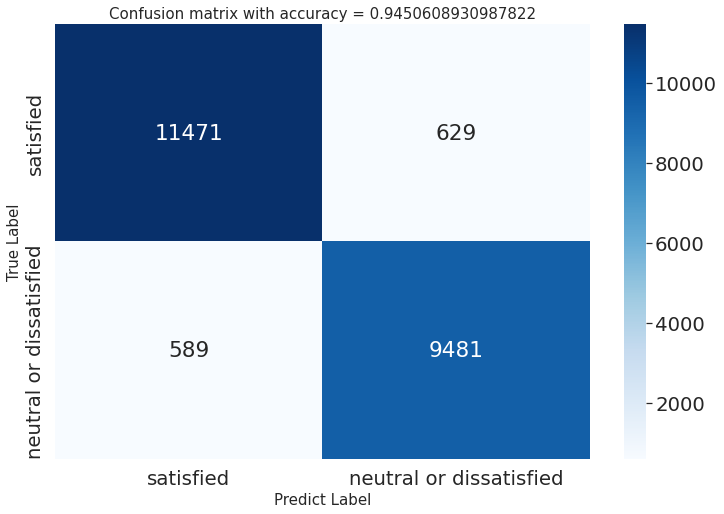

In [73]:
dt_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(dt_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["satisfied", "neutral or dissatisfied"], yticklabels=["satisfied", "neutral or dissatisfied"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

# XGBoost

In [74]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [75]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier()

In [66]:
y_pred = xgb_classifier.predict(X_test)

In [67]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["satisfied", "neutral or dissatisfied"]))

Accuracy = 0.940234551195309
                         precision    recall  f1-score   support

              satisfied       0.93      0.96      0.95     12100
neutral or dissatisfied       0.95      0.92      0.93     10070

               accuracy                           0.94     22170
              macro avg       0.94      0.94      0.94     22170
           weighted avg       0.94      0.94      0.94     22170



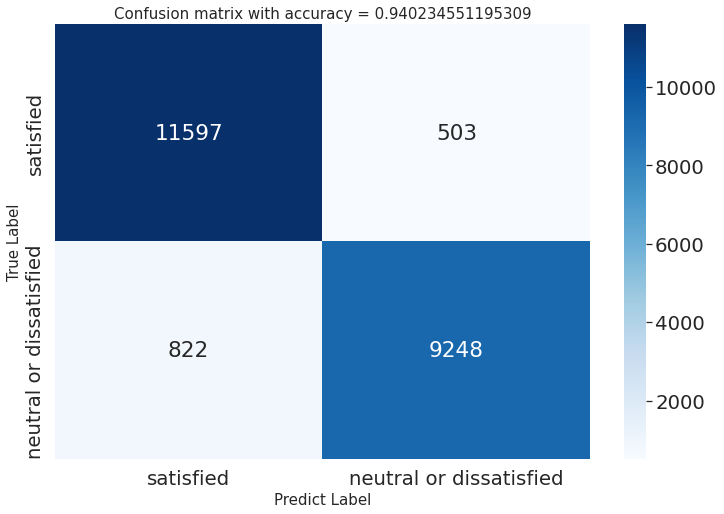

In [68]:
xgb_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(xgb_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["satisfied", "neutral or dissatisfied"], yticklabels=["satisfied", "neutral or dissatisfied"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()